In [1]:

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

2021-10-04 09:46:01.163059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-04 09:46:01.163102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Ran the import statements.


In [6]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2829,-117.7,33.5,13.0,4866.0,812.0,1909.0,733.0,5.0,244800.0
3667,-117.9,33.8,26.0,2737.0,614.0,1877.0,606.0,2.9,184300.0
11685,-121.3,38.6,25.0,3002.0,718.0,1660.0,613.0,2.1,89600.0
12831,-121.8,37.2,19.0,2635.0,427.0,1497.0,410.0,6.3,248000.0
1522,-117.2,33.2,16.0,1787.0,361.0,1446.0,362.0,3.8,163800.0


In [7]:
train_df.mean().head()

longitude            -119.6
latitude               35.6
housing_median_age     28.6
total_rooms          2643.7
total_bedrooms        539.4
dtype: float64

In [8]:
train_df.std().head()

longitude               2.0
latitude                2.1
housing_median_age     12.6
total_rooms          2179.9
total_bedrooms        421.5
dtype: float64

In [5]:
#we need to normalize the features.
#to do that we will find out Z- score of each
# Z - score n = (mean - data)/stdDaviation

train_df_mean = train_df.mean()
train_df_std = train_df_mean.std()
train_df_normalized = (train_df - train_df_mean)/train_df_std

train_df_normalized.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12609,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.4
12157,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-2.0
7982,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.9
12331,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.7
14964,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.7


In [9]:
# Calculate the Z-scores of each column in the test set and
# write those Z-scores into a new pandas DataFrame named test_df_norm.
test_df_mean = test_df.mean()
test_df_std  = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std
test_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.2,0.8,-0.1,0.6,0.3,0.1,0.3,1.5,1.2
1,0.6,-0.6,1.1,-0.5,-0.5,-0.6,-0.6,-0.1,-0.3
2,0.9,-0.9,-0.1,0.5,-0.1,0.1,0.0,1.1,0.6
3,0.6,-0.9,-0.1,-1.2,-1.2,-1.3,-1.3,1.3,1.1
4,-0.0,0.3,-0.8,-0.6,-0.7,-0.5,-0.7,-0.5,-1.1


In [10]:
threshold = 265000 # This is the 75th percentile for median house values.
train_df_normalized["median_house_value_is_high"] = (train_df["median_house_value"] > threshold).astype(float)
test_df_norm["median_house_value_is_high"] = (test_df["median_house_value"] <threshold).astype(float)

# Print out a few example cells from the beginning and 
# middle of the training set, just to make sure that
# your code created only 0s and 1s in the newly created
# median_house_value_is_high column
train_df_normalized["median_house_value_is_high"].head(8000)

12609   0.0
12157   0.0
7982    1.0
12331   0.0
14964   0.0
         ..
11365   0.0
1787    0.0
8007    1.0
611     0.0
9490    1.0
Name: median_house_value_is_high, Length: 8000, dtype: float64

In [11]:
#creating list to hold feature columns
feature_columns = []
median_income = tf.feature_column.numeric_column("median_income")

feature_columns.append(median_income)

tr = tf.feature_column.numeric_column("total_rooms")
feature_columns.append(tr)

feature_layer = layers.DenseFeatures(feature_columns)

feature_layer(dict(train_df_normalized))



2021-10-04 10:21:10.310453: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-04 10:21:10.310508: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harold-finch): /proc/driver/nvidia/version does not exist
2021-10-04 10:21:10.310829: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(17000, 2), dtype=float32, numpy=
array([[ 1.4908475e-05, -1.9255982e-03],
       [-4.0860315e-05, -1.2855248e-02],
       [-1.5157495e-05, -2.8444150e-02],
       ...,
       [ 4.4723297e-06, -1.6948422e-02],
       [ 4.3707259e-06, -1.2288876e-03],
       [-1.9548224e-05, -1.9982018e-02]], dtype=float32)>

In [12]:
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model 

In [13]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [14]:
#the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/20
Consider rewriting this model with the Functional API.


/home/arafat/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
170/170 [==============================] - 0s 868us/step - loss: 0.6696 - accuracy: 0.2498
Epoch 2/20
170/170 [==============================] - 0s 824us/step - loss: 0.6355 - accuracy: 0.2498
Epoch 3/20
170/170 [==============================] - 0s 793us/step - loss: 0.6082 - accuracy: 0.2498
Epoch 4/20
170/170 [==============================] - 0s 875us/step - loss: 0.5877 - accuracy: 0.4170
Epoch 5/20
170/170 [==============================] - 0s 856us/step - loss: 0.5738 - accuracy: 0.7329
Epoch 6/20
170/170 [==============================] - 0s 908us/step - loss: 0.5654 - accuracy: 0.7469
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.7485
Epoch 8/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7494
Epoch 9/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7494
Epoch 10/20
170/170 [=======================

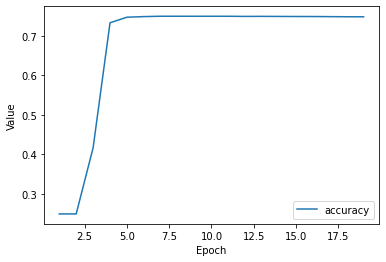

In [19]:
#the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"

clasification_threshold  = 0.35

#the metrics the model will measure
METRICS = [
    
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy', threshold = clasification_threshold),
]

#establishing models topography

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_df_normalized, epochs, label_name, batch_size)

list_of_metrics_to_plot = ['accuracy']

plot_curve(epochs, hist, list_of_metrics_to_plot)




In [21]:
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 3.5328 - accuracy: 0.2740


[3.53283429145813, 0.27399998903274536]

In [28]:
METRICS = [
    
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy', threshold = clasification_threshold),

    tf.keras.metrics.BinaryAccuracy(name = 'precision', threshold=clasification_threshold),
        tf.keras.metrics.BinaryAccuracy(name = "recall", threshold = clasification_threshold),


]


#establishing models topography

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_df_normalized, epochs, label_name, batch_size)

list_of_metrics_to_plot = ['accuracy',"precision", "recall"]

plot_curve(epochs, hist, list_of_metrics_to_plot)

TypeError: __init__() got an unexpected keyword argument 'thresholds'

Epoch 1/20
Consider rewriting this model with the Functional API.


/home/arafat/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 0.6719 - accuracy: 0.2498 - precision: 0.2498 - recall: 1.0000
Epoch 2/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.2498 - precision: 0.2498 - recall: 1.0000
Epoch 3/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.2498 - precision: 0.2498 - recall: 1.0000
Epoch 4/20
170/170 [==============================] - 0s 994us/step - loss: 0.5899 - accuracy: 0.3684 - precision: 0.2523 - recall: 0.7782
Epoch 5/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7496 - precision: 0.4000 - recall: 0.0042
Epoch 6/20
170/170 [==============================] - 0s 989us/step - loss: 0.5670 - accuracy: 0.7502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7502 - precision: 0.0000e+0

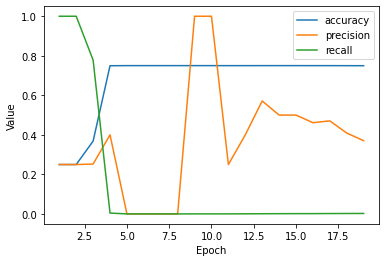

In [26]:
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_normalized, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)